In [2]:
from PIL import Image

In [3]:
import numpy as np

In [4]:
import time

In [5]:
from collections import Counter

In [6]:
import matplotlib.pyplot as plt

# PIL here is pillow and not python image lib 
# or something i guess

In [7]:
import functools

In [8]:
def createExamples():
    numberArrayExamples = open('numberArEx.txt' , 'a')
    numbersWeHave = range(0,10)
    versionsWeHave = range(1,10)
    
    for eachNum in numbersWeHave:
        for eachVer in versionsWeHave:
            imgFilePath = 'images/numbers/' + str(eachNum) + '.' + str(eachVer) + '.png'
            ei = Image.open(imgFilePath)
            eiar = np.array(ei)
            eiar1 = str(eiar.tolist())
            
            lineToWrite = str(eachNum) + ' >>> ' + eiar1 + '\n'
            numberArrayExamples.write(lineToWrite)
            
    '''for eachNum in numbersWeHave:
        for eachVer in versionsWeHave:
            imgFilePath = 'images/numbers_2/' + str(eachNum) + '_' + str(eachVer) + '.png'
            ei = Image.open(imgFilePath)
            eiar = np.array(ei)
            eiar1 = str(eiar.tolist())
            
            lineToWrite = str(eachNum) + ' >>> ' + eiar1 + '\n'
            numberArrayExamples.write(lineToWrite)'''

In [9]:
def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = functools.reduce(lambda x, y:x + y , eachPix[:3])/len(eachPix[:3])
            balanceAr.append(avgNum)
            
    balance = functools.reduce(lambda x, y:x + y , balanceAr)/len(balanceAr)
    
    for eachRow in newAr:
        for eachPix in eachRow:
            if functools.reduce(lambda x, y:x + y , eachPix[:3])/len(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    
    return newAr

# numpy array cannt be mutated ,tahts y we have created the newAr = imageArray

In [25]:
def whatNumIsThis(filePath):
    
    # is function me threshold() ko tikaya hai
    
    matchedAr = []
    loadExamps = open('numberArEx.txt','r').read()
    loadExamps = loadExamps.split('\n')
    
    # opening the image
    i = Image.open(filePath)
    # if the image format is not RGBA,convert it into RGBA,else carry on...
    if np.array(i)[0][0].shape[0] == 3:
        i = i.convert("RGBA")
    
    iar = np.array(i)
    iar_threshold = threshold(iar)
    iarl = iar_threshold.tolist()

    inQuestion = str(iarl)

    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split(' >>> ')
            currentNum = splitEx[0]
            currentAr = splitEx[1]
            
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')

            x = 0

            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))

                x+=1
        except Exception as e:
            print(str(e) + " but chill hai !!! :P")
                
    print(matchedAr)
    print(len(matchedAr))
    x = Counter(matchedAr)
    print(x)
    
    graphX = []
    graphY = []


    for eachThing in x:
        graphX.append(eachThing)
        graphY.append(x[eachThing])

    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3,colspan=4)
    
    ax1.imshow(iar)
    ax2.bar(graphX,graphY,align='center')
    plt.ylim(350)
    
    # xloc = plt.MaxNLocator(12)

    # ax2.xaxis.set_major_locator(xloc)

    plt.show()

    
    # lets see if this works
    # beta part hai neeche
    # print("x ka type is: " + str(type(x)))
    # print("ye raha x: " + str(x))
    # print( "ab iska type hai: ") 
    # print(type(list(x.keys())))
    # print(list(x.keys()))
    # print(list(x.keys())
    
    # x.most_common(k) gives a list of tuple of most common keys and its corresponding value
    
    print(  "and the winner is: " + str(x.most_common(1)[0][0])  )

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


list index out of range but chill hai !!! :P
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

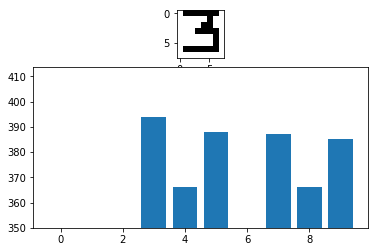

and the winner is: 3
list index out of range but chill hai !!! :P
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

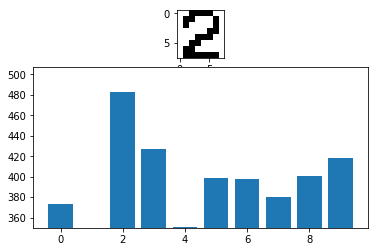

and the winner is: 2
list index out of range but chill hai !!! :P
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

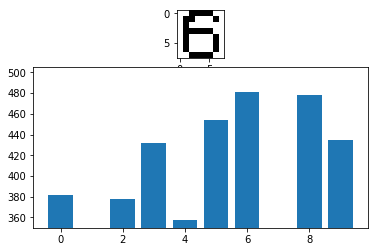

and the winner is: 6


In [26]:
whatNumIsThis('images/red3.png')
whatNumIsThis('images/numbers/2.3.png')
whatNumIsThis('images/numbers/6.8.png')

In [27]:
d=dict({1:100, 5:50 ,  3:20,4:1000})

In [28]:
d

{1: 100, 3: 20, 4: 1000, 5: 50}

In [29]:
d=Counter(d)

In [30]:
d

Counter({1: 100, 3: 20, 4: 1000, 5: 50})

In [55]:
maximum = max(d, key=d.get)  # Just use 'min' instead of 'max' for minimum.
print(maximum, d[maximum])

4 1000


In [56]:
# https://stackoverflow.com/questions/26871866/print-highest-value-in-dict-with-key

In [46]:
d.keys()

dict_keys([1, 5, 3, 4])

In [47]:
d.values()

dict_values([100, 50, 20, 1000])

In [48]:
d.items()

dict_items([(1, 100), (5, 50), (3, 20), (4, 1000)])